In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import re



In [35]:
os.chdir("/Users/TQC User/Desktop/BECs2/T1csvfiles")

In [41]:
all_files = os.listdir()    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))

In [42]:
print(csv_files)

['csvT1_S15_s250000.csv', 'csvT1_S200_s500000.csv', 'csvT1_S20_s50000.csv', 'csvT1_S50_s750000.csv', 'csvT1_S51_s500000.csv', 'csvT1_S900_s50000.csv']


In [55]:
int(re.findall(r'\d+', csv_files[0])[1])

16

In [64]:
all_runs = [] 
sample_numbers = np.zeros(len(csv_files))
for i in range(len(csv_files)):
    file = np.loadtxt(csv_files[i])
    all_runs.append(file) 

max_length = max(map(len, all_runs))
for i in range(len(all_runs)): 
    sample_numbers[i] = int(re.findall(r'\d+', csv_files[i])[1])
    print(len(all_runs[i]))
    if len(all_runs[i]) < max_length: 
        # then pad the array 
        
        padded_array = np.pad(all_runs[i], (0,max_length-len(all_runs[i])), 'constant', constant_values = np.nan)
        all_runs[i] = padded_array

# note: need to do a weighted average... 
avg_dist_t = np.ma.average(np.ma.masked_array(all_runs, np.isnan(all_runs)), axis = 0, weights = sample_numbers)
std_dist_t = np.sqrt(np.ma.average((np.ma.masked_array(all_runs, np.isnan(all_runs))-avg_dist_t)**2, axis = 0, weights = sample_numbers))


1002
2002
202
3002
2002
202


In [59]:
print(sample_numbers)

[ 15. 200.  20.  50.  51. 900.]


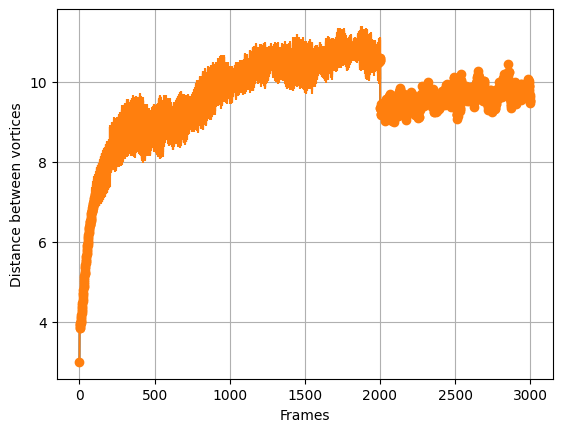

In [66]:
plt.figure() 

plt.plot(avg_dist_t) 
plt.errorbar(np.arange(0,len(avg_dist_t)), avg_dist_t, std_dist_t, marker = 'o')
plt.xlabel('Frames')
plt.ylabel('Distance between vortices')
plt.grid(True)